# Periodic Task Scheduling: Rate Monotonic (RM) Algorithm

## Introduction

**Rate Monotonic (RM)** is static algorithm assigning priorities according to their request rate (period)<br>
𝑳𝑳 $\equiv$ 𝑳𝒊𝒖 𝑳𝒂𝒚𝒍𝒂𝒏𝒅 𝒃𝒐𝒖𝒏𝒅<br>
LL Sufficient criteria for **schedulability** with RM 
$$U=\sum_{i=0}^n\frac{C_i}{T_i}<=n(2^{\frac{1}{n}}-1)$$
**Hyperbolic bound** less pessimistic than LL
$$\prod_{i=1}^n \left(\frac{C_i}{T_i}+1\right)<=2$$
### Key Properties
- **Optimal**: A set of tasks is schedulable with fixed priority algorithm A ⟹ is schedulable with DM
- **Static Priority**: Priorities are assigned once based on period and never changed
- **Preemptive**: Higher priority tasks can interrupt lower priority tasks

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image
import rate_monotonic as rtm
import task_schedule_visualizer as tsv
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!



### Example 1: Task set non schedulable

In [2]:
# Task Set 1: not schedulable
task_set_1 = [
    rtm.Task(period= 5,  deadline=5, execution_time=1),
    rtm.Task(period= 7, deadline= 7, execution_time=2),
    rtm.Task(period=10, deadline=10, execution_time=2),
    rtm.Task(period=14, deadline=14, execution_time=4) 
]

# Display task parameters in a table
def display_task_set(task_set, title="Task Set Parameters"):
    task_matrix = [[task.period, task.deadline, task.execution_time, task.deadline/task.period] for task in task_set]
    df = pd.DataFrame(task_matrix, columns=['Period (T)', 'Deadline (D)', 'Execution Time (C)', 'D/T Ratio'])
    
    # Calculate total utilization (C/T) and deadline utilization (C/D)
    total_util = sum(task.execution_time / task.period for task in task_set)
    
    print(f"📋 {title}:")
    display(df)
    print(f"💹 Total Utilization (∑C/T): {total_util:.3f}")
    print(f"📊 RM Bound (n=4): {4 * (2**(1/4) - 1):.3f}")
    print(f"🔄 RM Analysis: Uses T for priority assignment (shorter T = higher priority)")
    print()

# Display the task set parameters
display_task_set(task_set_1, "Task Set 1 Parameters - Not Schedulable")

📋 Task Set 1 Parameters - Not Schedulable:


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,5,5,1,1.0
1,7,7,2,1.0
2,10,10,2,1.0
3,14,14,4,1.0


💹 Total Utilization (∑C/T): 0.971
📊 RM Bound (n=4): 0.757
🔄 RM Analysis: Uses T for priority assignment (shorter T = higher priority)



📈 Task Set 1 - Rate Monotonic Schedule:


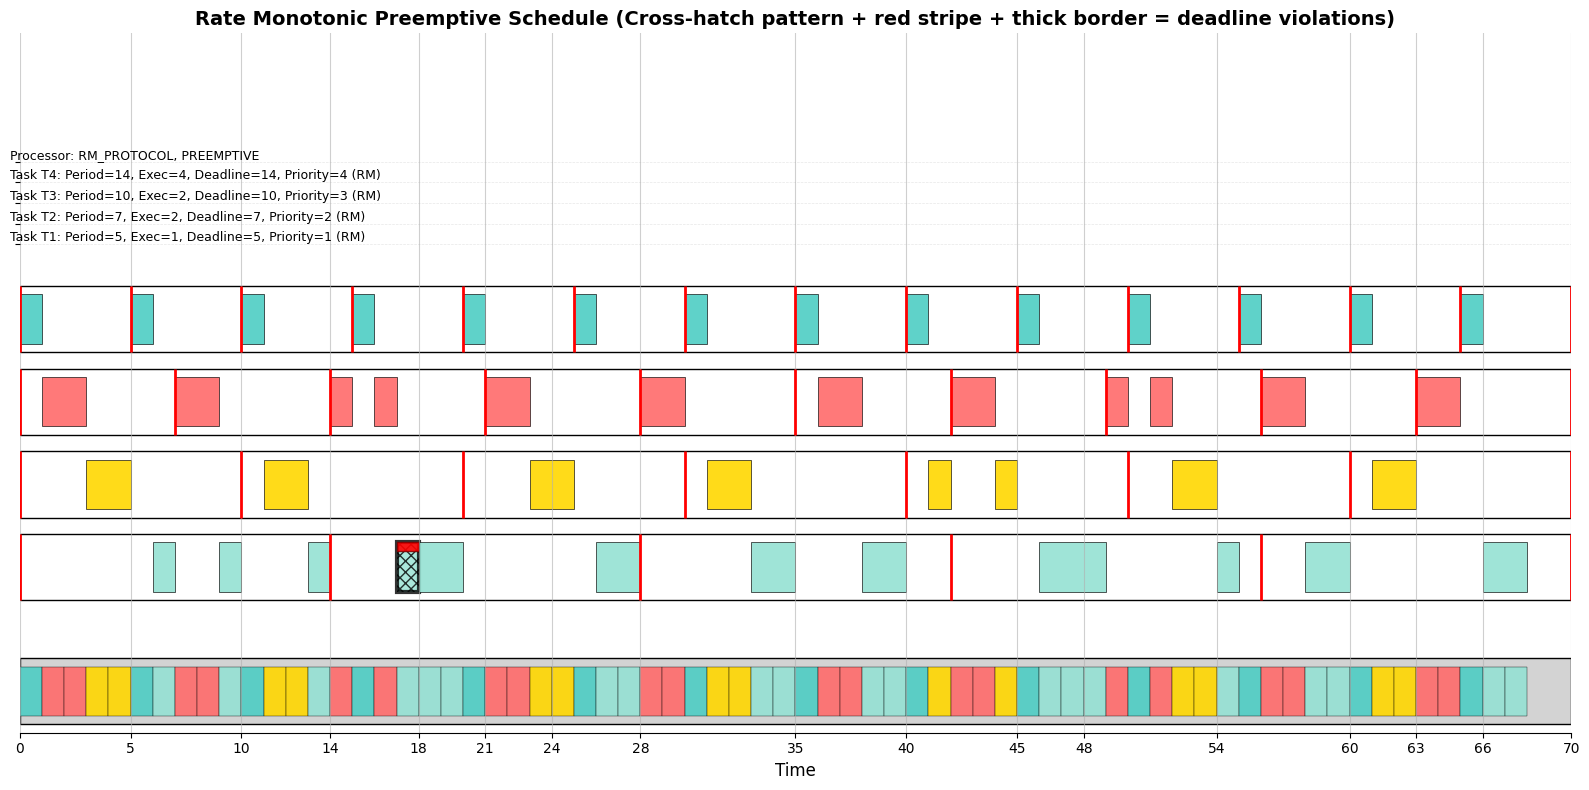

In [3]:
# Generate and display Task Set 1 schedule plot using Rate Monotonic
print("📈 Task Set 1 - Rate Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_1, lcm_cycles=1, algorithm='RM');

### Example 2: Task set schedulable correctly detected


In [4]:
# Task Set 2: schedulable and detected
task_set_2 = [
    rtm.Task(period= 5,  deadline=5, execution_time=1),
    rtm.Task(period= 7, deadline= 7, execution_time=2),
    rtm.Task(period=10, deadline=10, execution_time=2),
    rtm.Task(period=14, deadline=14, execution_time=3) 
]
# Display the task set parameters
display_task_set(task_set_2, "Task Set 2 Parameters - Schedulable")


📋 Task Set 2 Parameters - Schedulable:


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,5,5,1,1.0
1,7,7,2,1.0
2,10,10,2,1.0
3,14,14,3,1.0


💹 Total Utilization (∑C/T): 0.900
📊 RM Bound (n=4): 0.757
🔄 RM Analysis: Uses T for priority assignment (shorter T = higher priority)



📈 Task Set 2 - Rate Monotonic Schedule:


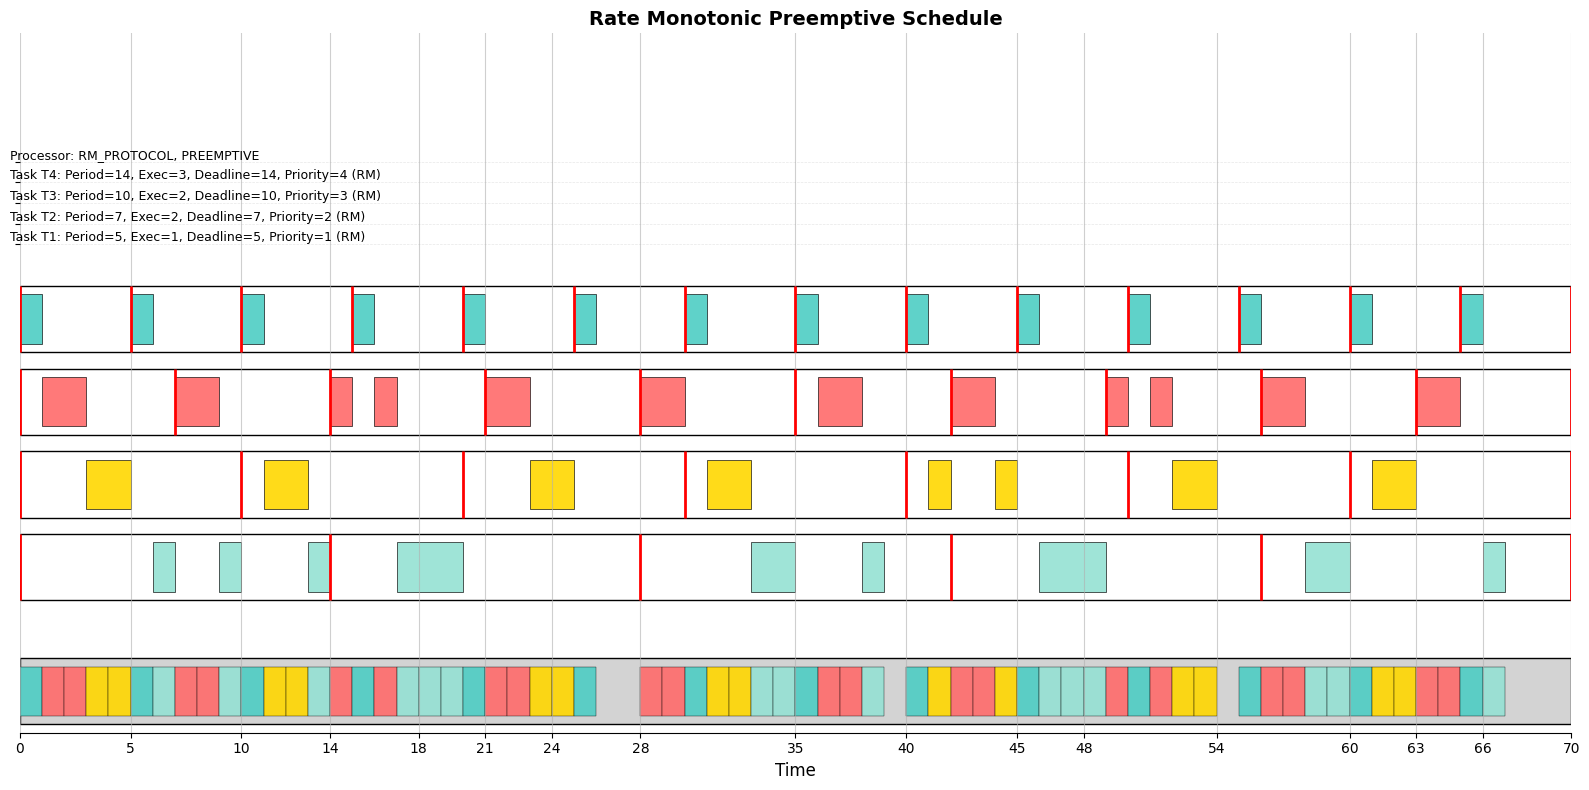

In [5]:
# Generate and display Task Set 2 schedule plot using Rate Monotonic
print("📈 Task Set 2 - Rate Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_2, lcm_cycles=1, algorithm='RM');

### Example 3: tasl set schedulable but above LL upper bound

In [8]:
# Task Set 2: schedulable and detected
task_set_3 = [
    rtm.Task(period= 5,  deadline=5, execution_time=1),
    rtm.Task(period=10, deadline=10, execution_time=3),
    rtm.Task(period=20, deadline=20, execution_time=6),
    rtm.Task(period=40, deadline=40, execution_time=8) 
]
# Display the task set parameters
display_task_set(task_set_3, "Task Set 3 Parameters - Schedulable")


📋 Task Set 3 Parameters - Schedulable:


,Period (T),Deadline (D),Execution Time (C),D/T Ratio
0,5,5,1,1.0
1,10,10,3,1.0
2,20,20,6,1.0
3,40,40,8,1.0


💹 Total Utilization (∑C/T): 1.000
📊 RM Bound (n=4): 0.757
🔄 RM Analysis: Uses T for priority assignment (shorter T = higher priority)



📈 Task Set 3 - Rate Monotonic Schedule:


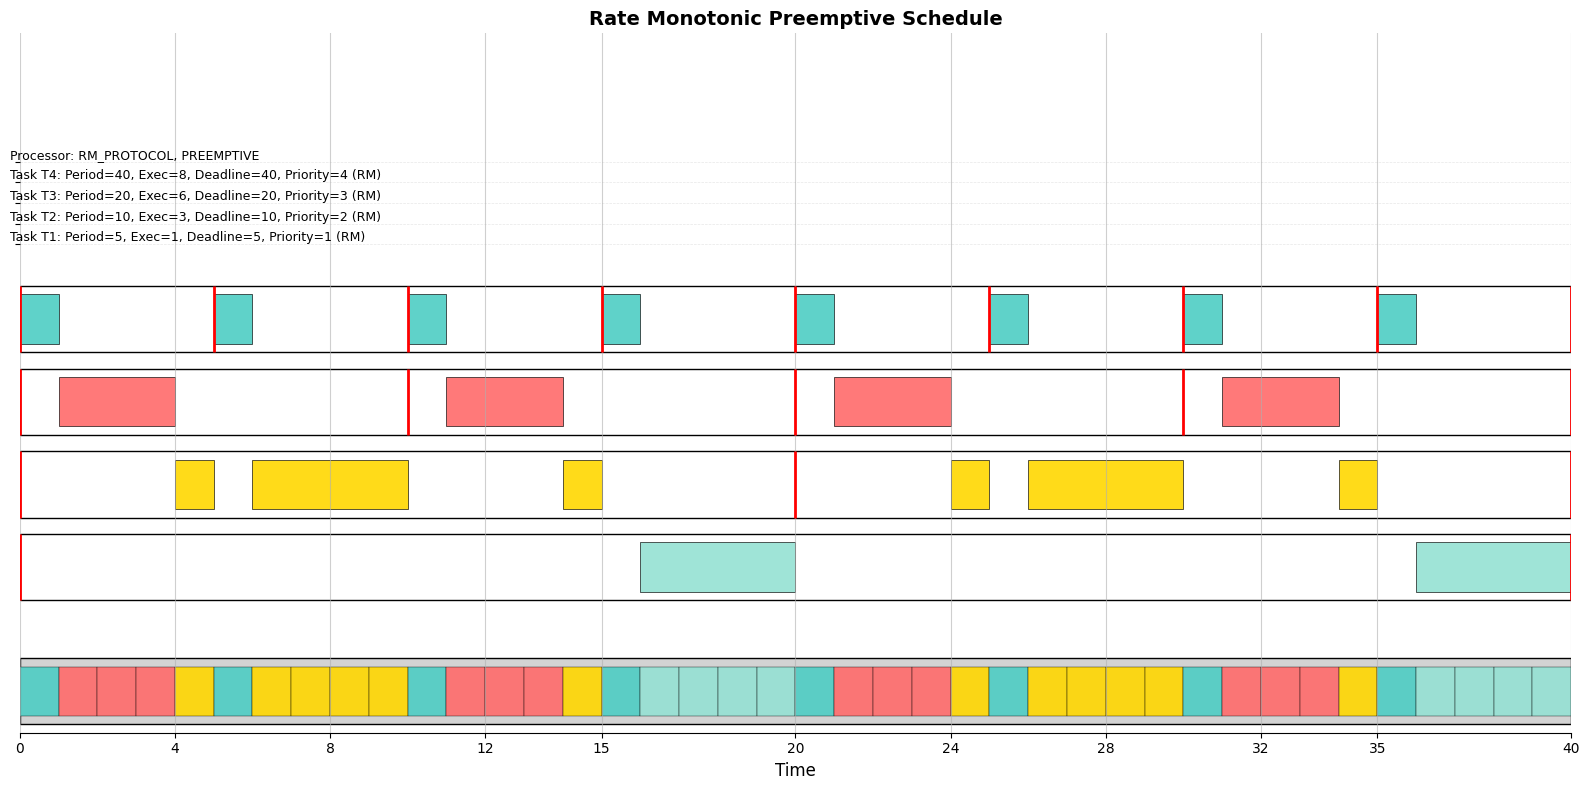

In [9]:
# Generate and display Task Set 3 schedule plot using Rate Monotonic
print("📈 Task Set 3 - Rate Monotonic Schedule:")
tsv.plot_rm_schedule_inline(task_set_3, lcm_cycles=1, algorithm='RM');